In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns
import pickle
import pprint

from scipy.stats import spearmanr, mannwhitneyu, kruskal

In [2]:
data = pd.read_csv("data/analiza_cleaned.csv")
with open("data/names.txt", "rb") as f:
    names = pickle.loads(f.read())
pprint.pprint(names)

{0: 'Vremenska oznaka',
 1: 'produktivnost',
 2: 'kolicina_rada',
 3: 'motivacija',
 4: 'jutarnja_rutina',
 5: 'pocetak_rada',
 6: 'pauza',
 7: 'mjesto_rada',
 8: 'kraj_rada',
 9: 'kucanske_obaveze',
 10: 'djeca_u_kuci',
 11: 'drugi_ukucani',
 12: 'sredstva_za_rad',
 13: 'rezije',
 14: 'radno_mjesto',
 15: 'uloga_unutar_poduzeca',
 16: 'interakcija_s_kolegama',
 17: 'promjena_interakcije',
 18: 'upravljanje_ljudima',
 19: 'atmosfera',
 20: 'zadovoljni',
 21: 'sektor_rada'}


In [3]:
ordered_lists = {}
ordered_lists['ordered_list1'] = ['Puno lošija', 'Lošija', 'Jednaka', 'Bolja', 'Puno bolja']
ordered_lists['ordered_list2'] = ['Nikad', 'Rijetko', 'Ponekad', 'Često', 'Uvijek']
ordered_lists['ordered_list3'] = ['Značajno manje', 'Manje', 'Podjednako', 'Više', 'Značajno više']
ordered_lists['ordered_list4'] = ['Ne', 'Da']
ordered_lists['ordered_list5'] = ['Ne', 'Ne u potpunosti', 'Da']
ordered_lists['ordered_list6'] = ['Jako smanjila', 'Smanjila', 'Ostala ista', 'Povećala', 'Jako povećala']
ordered_lists['ordered_list7'] = ['Loša', 'Ni loša ni dobra', 'Dobra']

for col in data:
    for key in ordered_lists.keys():
        if set(data[col].unique()).issubset(set(ordered_lists[key])):
            data[col] = pd.Categorical(data[col], categories=ordered_lists[key])
            break

In [4]:
data.describe()

names_ord = []
p_prod = []
p_rad = []
colors=['black','darkgray','gray','dimgray','lightgray']
colors.reverse()

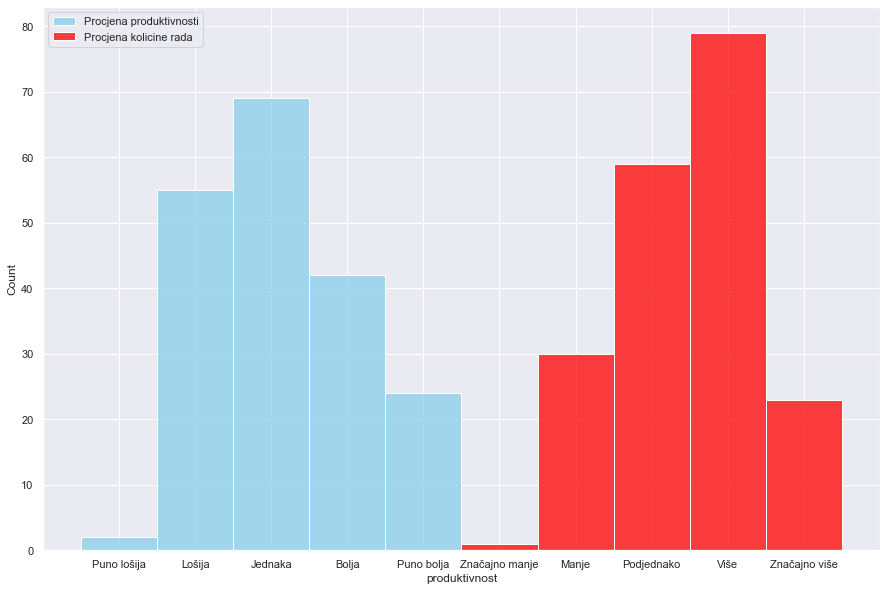

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(data=data, x=names[1],  color="skyblue", label="Procjena produktivnosti")
sns.histplot(data=data, x=names[2], color="red", label="Procjena kolicine rada")

plt.legend() 
plt.show()

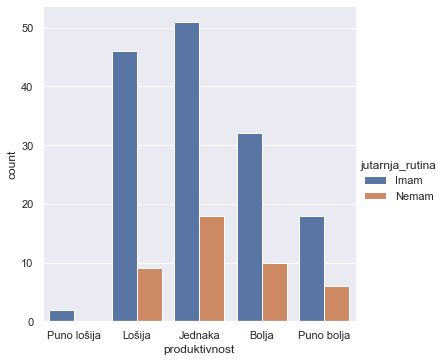

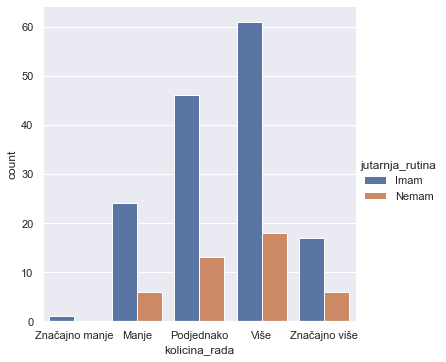

0.4623814707616636
0.666345959142925


In [6]:
sns.catplot(x=names[1], hue=names[4], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[4], kind='count', data=data, ci=None)
plt.show()

stat1, p1 = mannwhitneyu(data[data['jutarnja_rutina'] == 'Imam']['produktivnost'], data[data['jutarnja_rutina'] == 'Nemam']['produktivnost'], alternative='two-sided')
print(p1)

stat2, p2 = mannwhitneyu(data[data['jutarnja_rutina'] == 'Imam']['kolicina_rada'], data[data['jutarnja_rutina'] == 'Nemam']['kolicina_rada'], alternative='two-sided')
print(p2)

names_ord.append(names[4])
p_prod.append(p1)
p_rad.append(p2)

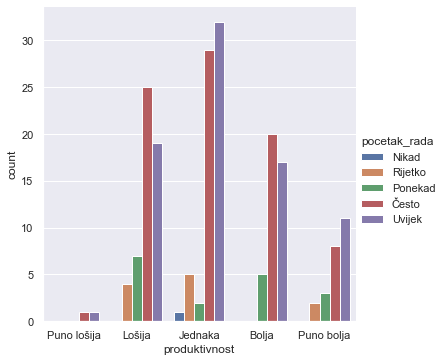

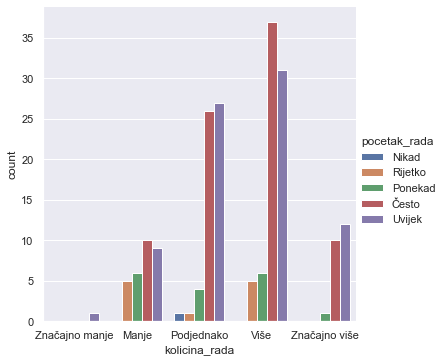

Često      83
Uvijek     80
Ponekad    17
Rijetko    11
Nikad       1
Name: pocetak_rada, dtype: int64
0.48661834493007206
0.10304891299859678


In [7]:
sns.catplot(x=names[1], hue=names[5], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[5], kind='count', data=data, ci=None)
plt.show()

print(data[names[5]].value_counts())

stat1, p1 = kruskal(data[data[names[5]] == 'Uvijek']['produktivnost'], data[data[names[5]] == 'Često']['produktivnost'], data[data[names[5]] == 'Ponekad']['produktivnost'], data[data[names[5]] == 'Rijetko']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[5]] == 'Uvijek']['kolicina_rada'], data[data[names[5]] == 'Često']['kolicina_rada'], data[data[names[5]] == 'Ponekad']['kolicina_rada'], data[data[names[5]] == 'Rijetko']['kolicina_rada'])
print(p2)

names_ord.append(names[5])
p_prod.append(p1)
p_rad.append(p2)

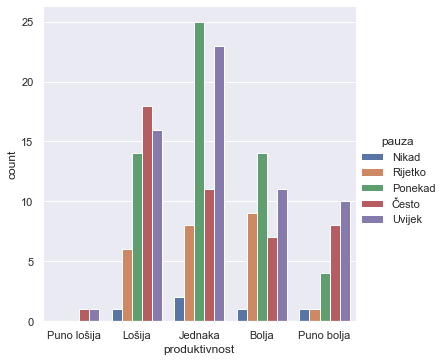

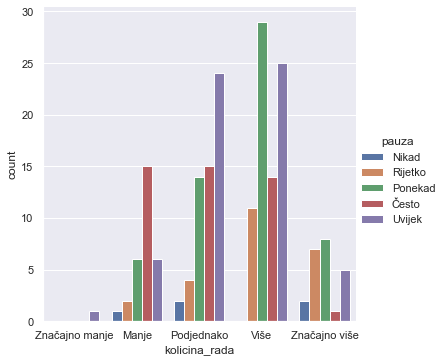

Uvijek     61
Ponekad    57
Često      45
Rijetko    24
Nikad       5
Name: pauza, dtype: int64
0.023793319754306923
0.00036511074823038816


In [8]:
sns.catplot(x=names[1], hue=names[6], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[6], kind='count', data=data, ci=None)
plt.show()

print(data[names[6]].value_counts())

stat1, p1 = kruskal(data[data[names[6]] == 'Uvijek']['produktivnost'], data[data[names[6]] == 'Često']['produktivnost'], data[data[names[6]] == 'Ponekad']['produktivnost'], data[data[names[6]] == 'Rijetko']['produktivnost'], data[data[names[6]] == 'Nikad']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[6]] == 'Uvijek']['kolicina_rada'], data[data[names[6]] == 'Često']['kolicina_rada'], data[data[names[6]] == 'Ponekad']['kolicina_rada'], data[data[names[6]] == 'Rijetko']['kolicina_rada'], data[data[names[6]] == 'Nikad']['kolicina_rada'])
print(p2)

names_ord.append(names[6])
p_prod.append(p1)
p_rad.append(p2)

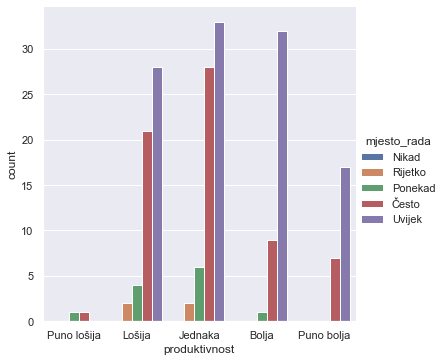

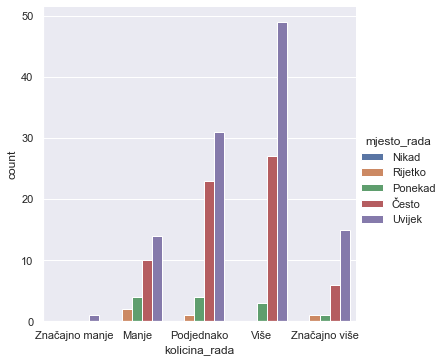

Uvijek     110
Često       66
Ponekad     12
Rijetko      4
Nikad        0
Name: mjesto_rada, dtype: int64
0.48330434717727266
0.11079772628045614


In [9]:
sns.catplot(x=names[1], hue=names[7], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[7], kind='count', data=data, ci=None)
plt.show()

print(data[names[7]].value_counts())

stat1, p1 = kruskal(data[data[names[7]] == 'Uvijek']['produktivnost'], data[data[names[7]] == 'Često']['produktivnost'], data[data[names[7]] == 'Ponekad']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[7]] == 'Uvijek']['kolicina_rada'], data[data[names[7]] == 'Često']['kolicina_rada'], data[data[names[7]] == 'Ponekad']['kolicina_rada'])
print(p2)

names_ord.append(names[7])
p_prod.append(p1)
p_rad.append(p2)

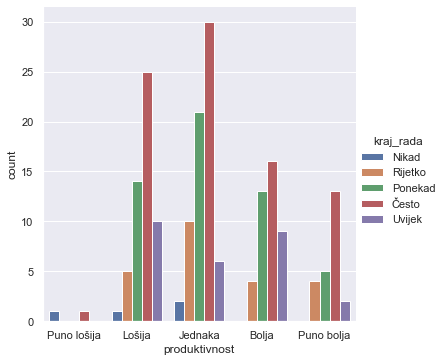

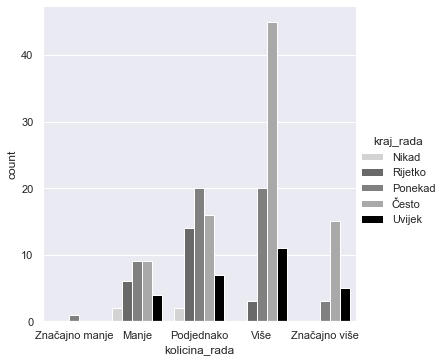

Često      85
Ponekad    53
Uvijek     27
Rijetko    23
Nikad       4
Name: kraj_rada, dtype: int64
0.5090900898640809
3.0127079403715287e-05
0.2315107086039233
0.008081221227788093


In [10]:
sns.catplot(x=names[1], hue=names[8], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[8], kind='count', data=data, ci=None, palette=colors)
plt.show()

print(data[names[8]].value_counts())

stat1, p1 = kruskal(data[data[names[8]] == 'Uvijek']['produktivnost'], data[data[names[8]] == 'Često']['produktivnost'], data[data[names[8]] == 'Ponekad']['produktivnost'], data[data[names[8]] == 'Rijetko']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[8]] == 'Uvijek']['kolicina_rada'], data[data[names[8]] == 'Često']['kolicina_rada'], data[data[names[8]] == 'Ponekad']['kolicina_rada'], data[data[names[8]] == 'Rijetko']['kolicina_rada'])
print(p2)

stat3, p3 = mannwhitneyu(data[data[names[8]] == 'Uvijek']['kolicina_rada'], data[data[names[8]] == 'Često']['kolicina_rada'])
print(p3)

stat3, p3 = mannwhitneyu(data[data[names[8]] == 'Ponekad']['kolicina_rada'], data[data[names[8]] == 'Rijetko']['kolicina_rada'])
print(p3)

names_ord.append(names[8])
p_prod.append(p1)
p_rad.append(p2)

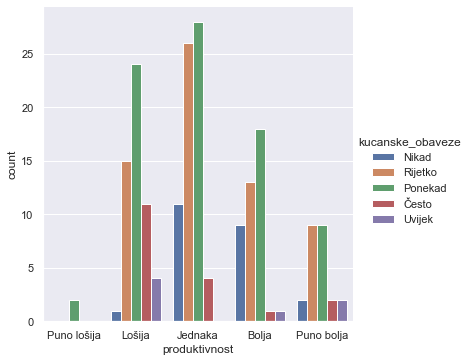

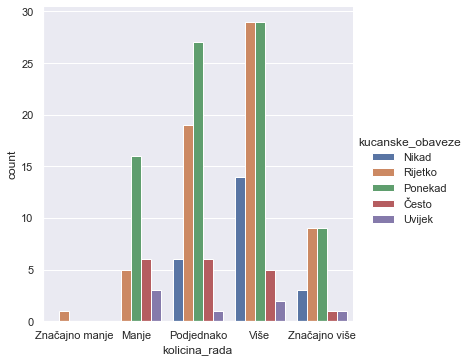

Ponekad    81
Rijetko    63
Nikad      23
Često      18
Uvijek      7
Name: kucanske_obaveze, dtype: int64
0.004492498946298442
0.011398671559715426


In [11]:
sns.catplot(x=names[1], hue=names[9], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[9], kind='count', data=data, ci=None)
plt.show()

print(data[names[9]].value_counts())

stat1, p1 = kruskal(data[data[names[9]] == 'Uvijek']['produktivnost'], data[data[names[9]] == 'Često']['produktivnost'], data[data[names[9]] == 'Ponekad']['produktivnost'], data[data[names[9]] == 'Rijetko']['produktivnost'], data[data[names[9]] == 'Nikad']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[9]] == 'Uvijek']['kolicina_rada'], data[data[names[9]] == 'Često']['kolicina_rada'], data[data[names[9]] == 'Ponekad']['kolicina_rada'], data[data[names[9]] == 'Rijetko']['kolicina_rada'], data[data[names[9]] == 'Nikad']['kolicina_rada'])
print(p2)

names_ord.append(names[9])
p_prod.append(p1)
p_rad.append(p2)

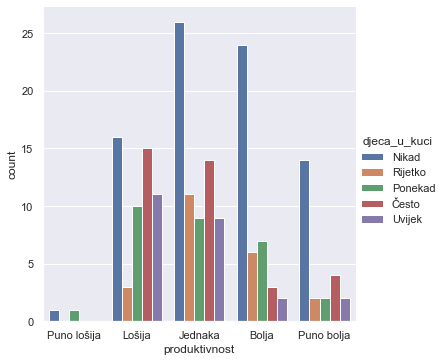

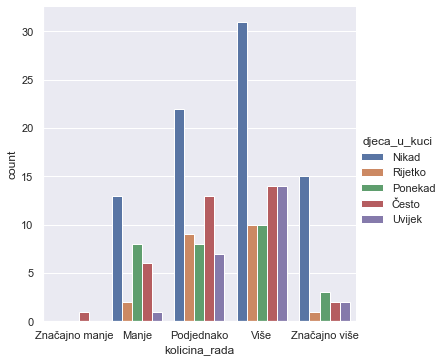

Nikad      81
Često      36
Ponekad    29
Uvijek     24
Rijetko    22
Name: djeca_u_kuci, dtype: int64
0.17143097844386032
0.34669506513414405


In [12]:
sns.catplot(x=names[1], hue=names[10], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[10], kind='count', data=data, ci=None)
plt.show()

print(data[names[10]].value_counts())

stat1, p1 = kruskal(data[data[names[10]] == 'Uvijek']['produktivnost'], data[data[names[10]] == 'Često']['produktivnost'], data[data[names[10]] == 'Ponekad']['produktivnost'], data[data[names[10]] == 'Rijetko']['produktivnost'], data[data[names[10]] == 'Nikad']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[10]] == 'Uvijek']['kolicina_rada'], data[data[names[10]] == 'Često']['kolicina_rada'], data[data[names[10]] == 'Ponekad']['kolicina_rada'], data[data[names[10]] == 'Rijetko']['kolicina_rada'], data[data[names[10]] == 'Nikad']['kolicina_rada'])
print(p2)

names_ord.append(names[10])
p_prod.append(p1)
p_rad.append(p2)

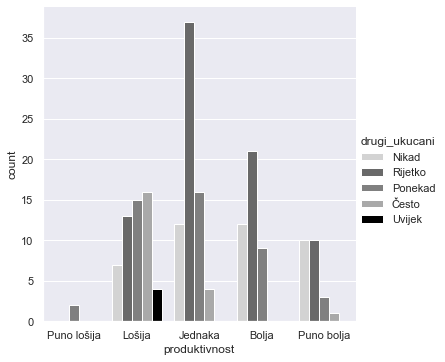

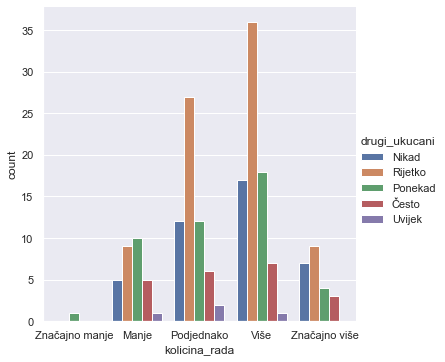

Rijetko    81
Ponekad    45
Nikad      41
Često      21
Uvijek      4
Name: drugi_ukucani, dtype: int64
0.008911046370469538
0.6088485381695095
0.8 , n: 20 , u: 25


In [13]:
sns.catplot(x=names[1], hue=names[11], kind='count', data=data, ci=None, palette=colors)
sns.catplot(x=names[2], hue=names[11], kind='count', data=data, ci=None)
plt.show()

print(data[names[11]].value_counts())

stat1, p1 = kruskal(data[data[names[11]] == 'Često']['produktivnost'], data[data[names[11]] == 'Ponekad']['produktivnost'], data[data[names[11]] == 'Rijetko']['produktivnost'], data[data[names[11]] == 'Nikad']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[11]] == 'Često']['kolicina_rada'], data[data[names[11]] == 'Ponekad']['kolicina_rada'], data[data[names[11]] == 'Rijetko']['kolicina_rada'], data[data[names[11]] == 'Nikad']['kolicina_rada'])
print(p2)

n = data[data[names[11]] == 'Često']['produktivnost'].value_counts()['Lošija'] + data[data[names[11]] == 'Uvijek']['produktivnost'].value_counts()['Lošija']
u = data[data[names[11]] == 'Često']['produktivnost'].count() + data[data[names[11]] == 'Uvijek']['produktivnost'].count() 
print(n/u, ", n:", n, ", u:", u)

names_ord.append(names[11])
p_prod.append(p1)
p_rad.append(p2)

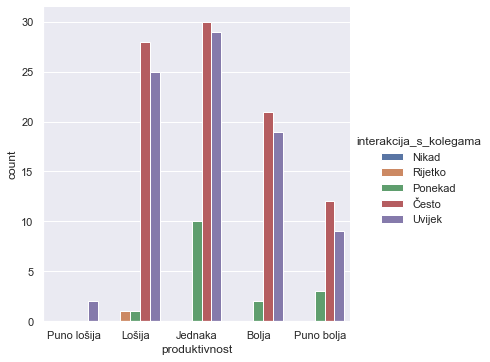

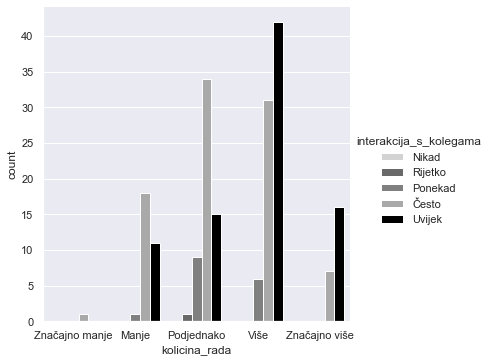

Često      91
Uvijek     84
Ponekad    16
Rijetko     1
Nikad       0
Name: interakcija_s_kolegama, dtype: int64
0.9674837070159732
0.002185844378761919


In [14]:
sns.catplot(x=names[1], hue=names[16], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[16], kind='count', data=data, ci=None, palette=colors)
plt.show()

print(data[names[16]].value_counts())

stat1, p1 = kruskal(data[data[names[16]] == 'Često']['produktivnost'], data[data[names[16]] == 'Ponekad']['produktivnost'], data[data[names[16]] == 'Uvijek']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[16]] == 'Često']['kolicina_rada'], data[data[names[16]] == 'Ponekad']['kolicina_rada'], data[data[names[16]] == 'Uvijek']['kolicina_rada'])
print(p2)

names_ord.append(names[16])
p_prod.append(p1)
p_rad.append(p2)

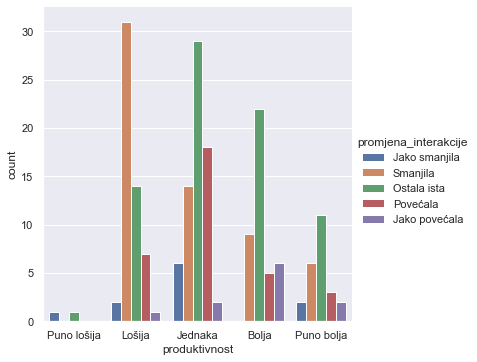

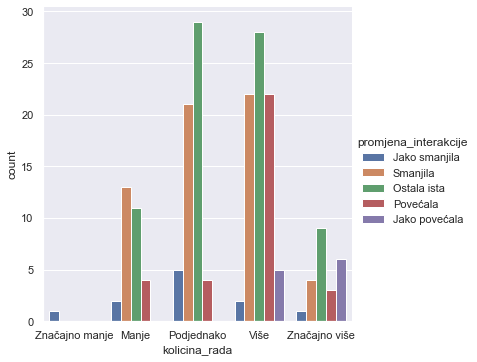

Ostala ista      77
Smanjila         60
Povećala         33
Jako povećala    11
Jako smanjila    11
Name: promjena_interakcije, dtype: int64
0.02994723998848699
0.00021458617967960646


In [15]:
sns.catplot(x=names[1], hue=names[17], kind='count', data=data, ci=None)
sns.catplot(x=names[2], hue=names[17], kind='count', data=data, ci=None)
plt.show()

print(data[names[17]].value_counts())

stat1, p1 = kruskal(data[data[names[17]] == 'Jako smanjila']['produktivnost'], data[data[names[17]] == 'Smanjila']['produktivnost'], data[data[names[17]] == 'Ostala ista']['produktivnost'], data[data[names[17]] == 'Povećala']['produktivnost'], data[data[names[17]] == 'Jako povećala']['produktivnost'])
print(p1)

stat2, p2 = kruskal(data[data[names[17]] == 'Jako smanjila']['kolicina_rada'], data[data[names[17]] == 'Smanjila']['kolicina_rada'], data[data[names[17]] == 'Ostala ista']['kolicina_rada'], data[data[names[17]] == 'Povećala']['kolicina_rada'], data[data[names[17]] == 'Jako povećala']['kolicina_rada'])
print(p2)

names_ord.append(names[17])
p_prod.append(p1)
p_rad.append(p2)

In [16]:
for i in range(0, len(p_prod)):
    print(names_ord[i], "\np value for productivity:", p_prod[i], "\np value for amount of work:", p_rad[i])

jutarnja_rutina 
p value for productivity: 0.4623814707616636 
p value for amount of work: 0.666345959142925
pocetak_rada 
p value for productivity: 0.48661834493007206 
p value for amount of work: 0.10304891299859678
pauza 
p value for productivity: 0.023793319754306923 
p value for amount of work: 0.00036511074823038816
mjesto_rada 
p value for productivity: 0.48330434717727266 
p value for amount of work: 0.11079772628045614
kraj_rada 
p value for productivity: 0.5090900898640809 
p value for amount of work: 3.0127079403715287e-05
kucanske_obaveze 
p value for productivity: 0.004492498946298442 
p value for amount of work: 0.011398671559715426
djeca_u_kuci 
p value for productivity: 0.17143097844386032 
p value for amount of work: 0.34669506513414405
drugi_ukucani 
p value for productivity: 0.008911046370469538 
p value for amount of work: 0.6088485381695095
interakcija_s_kolegama 
p value for productivity: 0.9674837070159732 
p value for amount of work: 0.002185844378761919
promjen

In [27]:
for i, elem in enumerate(names_ord):
    temp = elem.split('_')
    elem = " ".join(temp)
    temp = list(elem)
    temp[0] = temp[0].upper()
    names_ord[i]= ''.join(temp)
#print(names_ord)
p_out = []
for i in range(0, len(p_prod)):
    p_out.append([float("{:.5f}".format(float(p_prod[i]))), float("{:.5f}".format(float(p_rad[i])))])
print(p_out)

[[0.46238, 0.66635], [0.48662, 0.10305], [0.02379, 0.00037], [0.4833, 0.1108], [0.50909, 3e-05], [0.00449, 0.0114], [0.17143, 0.3467], [0.00891, 0.60885], [0.96748, 0.00219], [0.02995, 0.00021]]


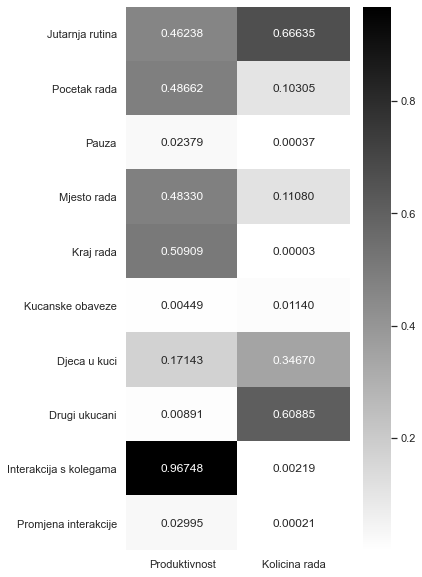

In [33]:
sns.set(rc={'figure.figsize':(5,10)})
sns.heatmap(p_out, xticklabels=['Produktivnost', 'Kolicina rada'], yticklabels=names_ord, annot=True,  fmt=".5f", annot_kws={"size": 12}, cmap='gray_r')

In [113]:
for i, col in enumerate(data):
    print(data[col].value_counts(normalize=True))

Jednaka        0.359375
Lošija         0.286458
Bolja          0.218750
Puno bolja     0.125000
Puno lošija    0.010417
Name: produktivnost, dtype: float64
Više              0.411458
Podjednako        0.307292
Manje             0.156250
Značajno više     0.119792
Značajno manje    0.005208
Name: kolicina_rada, dtype: float64
Imam     0.776042
Nemam    0.223958
Name: jutarnja_rutina, dtype: float64
Često      0.432292
Uvijek     0.416667
Ponekad    0.088542
Rijetko    0.057292
Nikad      0.005208
Name: pocetak_rada, dtype: float64
Uvijek     0.317708
Ponekad    0.296875
Često      0.234375
Rijetko    0.125000
Nikad      0.026042
Name: pauza, dtype: float64
Uvijek     0.572917
Često      0.343750
Ponekad    0.062500
Rijetko    0.020833
Nikad      0.000000
Name: mjesto_rada, dtype: float64
Često      0.442708
Ponekad    0.276042
Uvijek     0.140625
Rijetko    0.119792
Nikad      0.020833
Name: kraj_rada, dtype: float64
Ponekad    0.421875
Rijetko    0.328125
Nikad      0.119792
Često     